<a href="https://colab.research.google.com/github/Maxidoz/2401ftds_python_week_2/blob/main/QCTO_Workplace_Module_River_Water_Contamination_Analysis_Masixole_final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QCTO - Workplace Module

### Project Title: **River Water Contamination Analysis**
#### Done By: **Masixole Nondumo**

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [3]:
#Please use code cells to code in and do not forget to comment your code
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [5]:
cd '/content/gdrive/MyDrive/River_water_contamination_analysis_project'

/content/gdrive/MyDrive/River_water_contamination_analysis_project


In [6]:
!pwd

/content/gdrive/MyDrive/River_water_contamination_analysis_project


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

## Dataset <a class="anchor" id="dataset"></a>


<table>
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>Date (DD/MM/YYYY)</td>
    <td>The date the sample was taken.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Time (24 hrs XX:XX)</td>
    <td>The time the sample was taken.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Sampling point</td>
    <td>The name of the place where the sample was taken.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Ambient temperature (°C)</td>
    <td>The temperature of the surrounding environment.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Ambient humidity</td>
    <td>The humidity of the surrounding environment.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Sample temperature (°C)</td>
    <td>The temperature of the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>pH</td>
    <td>The pH of the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>EC (µS/cm)</td>
    <td>The electrical conductivity of the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>TDS (mg/L)</td>
    <td>The total dissolved solids in the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>TSS (mL sed/L)</td>
    <td>The total suspended solids in the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>DO (mg/L)</td>
    <td>The dissolved oxygen in the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Level (cm)</td>
    <td>The water level.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Turbidity (NTU)</td>
    <td>The turbidity of the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Hardness (mg CaCO3/L)</td>
    <td>The hardness of the water sample.</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Hardness classification</td>
    <td>The hardness classification of the water sample.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>Total Cl- (mg Cl-/L)</td>
    <td>The total chloride in the water sample.</td>
    <td>Numerical</td>
  </tr>
</table>

###**Data Description**

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Read the CSV file into a DataFrame
df = pd.read_csv('River water parameters.xlsx - Base de Datos.csv')

# Create a DataFrame with the coordinates of each sampling point
coordinates = pd.DataFrame({
    'Sampling point': ['Puente Bilbao', 'Arroyo_Las Torres', 'Puente Irigoyen', 'Puente Falbo', 'Arroyo Salguero'],
    'Latitude': [-34.574433, -34.578544, -34.579375, -34.580619, -34.576511],
    'Longitude': [-58.487694, -58.495511, -58.499922, -58.501347, -58.498567]
})

# Merge the `df` with `coordinates`
dz = pd.merge(df, coordinates, on='Sampling point')

import geopandas as gpd

# Create a geometry column using the `points_from_xy` function
dz['geometry'] = gpd.points_from_xy(dz['Longitude'], dz['Latitude'])

# Convert the DataFrame to a GeoDataFrame
dz = gpd.GeoDataFrame(dz, geometry='geometry')

# Set the coordinate reference system (CRS)
dz.crs = 'EPSG:4326'

dz.to_csv('river_water_parameters_geom.csv')

In [8]:
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,9/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [9]:
dz.head(20)

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L),Latitude,Longitude,geometry
0,9/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443)
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.20,94.0,BLANDA,78.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443)
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.90,86.0,BLANDA,82.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443)
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.70,200.0,SEMIDURA,117.0,-34.578544,-58.495511,POINT (-58.49551 -34.57854)
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.60,196.0,SEMIDURA,117.0,-34.578544,-58.495511,POINT (-58.49551 -34.57854)
5,14/06/2023,15:00,Puente Irigoyen,11.9,0.47,13.0,8.2,1200,590,26.0,5.44,NaN,24.60,151.0,SEMIDURA,109.0,-34.579375,-58.499922,POINT (-58.49992 -34.57938)
6,14/06/2023,15:00,Puente Irigoyen,11.9,0.47,12.9,8.2,1220,600,26.0,5.34,NaN,24.00,151.0,SEMIDURA,113.0,-34.579375,-58.499922,POINT (-58.49992 -34.57938)
7,14/06/2023,15:30,Puente Falbo,11.9,0.47,12.8,8.0,1260,620,36.0,2.24,NaN,21.00,139.0,BLANDA,113.0,-34.580619,-58.501347,POINT (-58.50135 -34.58062)
8,14/06/2023,15:30,Puente Falbo,11.9,0.47,12.9,8.0,1260,620,36.0,1.95,NaN,21.50,139.0,BLANDA,113.0,-34.580619,-58.501347,POINT (-58.50135 -34.58062)
9,23/6/2023,12:30,Puente Bilbao,10.4,0.87,13.9,8.2,1250,620,28.0,4.55,NaN,60.50,102.0,BLANDA,121.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443)


In [10]:
df.shape

(219, 16)

In [11]:
dz.shape

(219, 19)

In [12]:
df.columns

Index(['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point',
       'Ambient temperature (°C)', 'Ambient humidity',
       'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)',
       'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)',
       'Hardness\n(mg CaCO3/L)', 'Hardness classification',
       'Total Cl-\n(mg Cl-/L)'],
      dtype='object')

In [ ]:
dz.columns

Index(['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point',
       'Ambient temperature (°C)', 'Ambient humidity',
       'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)',
       'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)',
       'Hardness\n(mg CaCO3/L)', 'Hardness classification',
       'Total Cl-\n(mg Cl-/L)', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [13]:
df = rq.copy()
dz = zz.copy()

NameError: name 'rq' is not defined

## Data Cleaning <a class="anchor" id="chapter4"></a>

<div class="alert alert-block alert-info">
<b>Data cleaning</b> is a critical phase in the data analysis process that involves correcting or removing inaccurate, corrupted, duplicate, or incomplete data from a dataset. It assures the correctness and dependability of subsequent analyses and decisions by employing a variety of strategies like as filling missing values, removing outliers, and standardising data formats.
</div>

In [14]:
#The check_null_values function goes through each column in a DataFrame to detect and display the number of null values, offering null counts specific to each column.
def check_null_values(dt):
    """
    Iterates over each column in a DataFrame to identify and print the count of null values.

    Parameters:
    dt (DataFrame): The DataFrame to check for null values.
    """
    for column in dt.columns:
        null_count = dt[column].isnull().sum()
        print(f"Column '{column}' has {null_count} null values.")


In [15]:
check_null_values(dz)

Column 'Date (DD/MM/YYYY)' has 0 null values.
Column 'Time (24 hrs XX:XX)' has 0 null values.
Column 'Sampling point' has 0 null values.
Column 'Ambient temperature (°C)' has 0 null values.
Column 'Ambient humidity' has 0 null values.
Column 'Sample temperature (°C)' has 0 null values.
Column 'pH' has 0 null values.
Column 'EC
(µS/cm)' has 0 null values.
Column 'TDS
(mg/L)' has 0 null values.
Column 'TSS
(mL sed/L)' has 6 null values.
Column 'DO
(mg/L)' has 0 null values.
Column 'Level (cm)' has 39 null values.
Column 'Turbidity (NTU)' has 1 null values.
Column 'Hardness
(mg CaCO3/L)' has 2 null values.
Column 'Hardness classification' has 2 null values.
Column 'Total Cl-
(mg Cl-/L)' has 6 null values.
Column 'Latitude' has 0 null values.
Column 'Longitude' has 0 null values.
Column 'geometry' has 0 null values.


In [16]:
import geopandas as gpd

# Assuming 'dz' is your GeoDataFrame
dz.fillna("NA", inplace=True)  # Replace null values with "NA"

# Now, 'dz' will have "NA" instead of null values

In [17]:
#The function count_duplicate_rows is used to identify duplicate entries in a DataFrame using the duplicated method, and then calculates the total count of duplicate rows. The function is beneficial for data cleansing tasks, as it helps maintain uniqueness in datasets by providing the number of duplicate rows.
def count_duplicate_rows(dt):
    """
    Checks a DataFrame for duplicate entries and summarizes the total number of duplicate rows.

    Parameters:
    df (DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows in the DataFrame.
    """
    duplicate_count = dt.duplicated().sum()
    print(f"Total number of duplicate rows: {duplicate_count}")
    return duplicate_count


In [18]:
count_duplicate_rows(dz)

Total number of duplicate rows: 0


0

In [19]:
#The function preprocess_data conducts necessary data cleaning tasks on a DataFrame by addressing missing values, replacing gaps with statistical values (mean and median), and removing unnecessary columns. Upon completion of the process, it displays the initial two rows of the refined DataFrame for a rapid check and provides the complete altered DataFrame for additional utilization.
def preprocess_data(dt):
    """
    Preprocesses the emissions_copy DataFrame by handling missing values:
    - Calculates the percentage of missing values for each column.
    - Plots distributions of columns with missing values.
    - Imputes missing values based on skewness and percentage of missing values.
    - Saves the cleaned DataFrame to a CSV file.

    Parameters:
    emissions_copy (DataFrame): The DataFrame to preprocess.

    Returns:
    None
    """
     # Calculate the percentage of missing values for each column
    missing_values_percentage = dt.isnull().mean() * 100

    # Identify columns with missing values
    columns_with_missing_values = dt.columns[dt.isnull().any()].tolist()

    # Plot histograms for columns with missing values
    plt.figure(figsize=(15, 20))
    for i, column in enumerate(columns_with_missing_values, 1):
        plt.subplot(6, 2, i)
        sns.histplot(dt[column].dropna(), kde=True)
        plt.title(column)
    plt.tight_layout()
    plt.show()

    # Impute missing values based on distribution and percentage of missing values
    for column in columns_with_missing_values:
        pct_missing = missing_values_percentage[column]

        if pct_missing < 20:
            # If less than 20% missing, impute based on distribution
            if dt[column].skew() < 1:
                dt[column].fillna(dt[column].mean(), inplace=True)
            else:
                dt[column].fillna(dt[column].median(), inplace=True)
        else:
            print(f"Column '{column}' has {pct_missing:.2f}% missing values.")
    return(dt)


In [20]:
dz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Date (DD/MM/YYYY)         219 non-null    object  
 1   Time (24 hrs XX:XX)       219 non-null    object  
 2   Sampling point            219 non-null    object  
 3   Ambient temperature (°C)  219 non-null    float64 
 4   Ambient humidity          219 non-null    float64 
 5   Sample temperature (°C)   219 non-null    float64 
 6   pH                        219 non-null    float64 
 7   EC
(µS/cm)                219 non-null    int64   
 8   TDS
(mg/L)                219 non-null    int64   
 9   TSS
(mL sed/L)            219 non-null    object  
 10  DO
(mg/L)                 219 non-null    float64 
 11  Level (cm)                219 non-null    object  
 12  Turbidity (NTU)           219 non-null    object  
 13  Hardness
(mg CaCO3/L)     219 non-null    

In [21]:
print(dz.isnull().sum())

Date (DD/MM/YYYY)           0
Time (24 hrs XX:XX)         0
Sampling point              0
Ambient temperature (°C)    0
Ambient humidity            0
Sample temperature (°C)     0
pH                          0
EC\n(µS/cm)                 0
TDS\n(mg/L)                 0
TSS\n(mL sed/L)             0
DO\n(mg/L)                  0
Level (cm)                  0
Turbidity (NTU)             0
Hardness\n(mg CaCO3/L)      0
Hardness classification     0
Total Cl-\n(mg Cl-/L)       0
Latitude                    0
Longitude                   0
geometry                    0
dtype: int64


In [23]:
check_null_values(dz)

Column 'Date (DD/MM/YYYY)' has 0 null values.
Column 'Time (24 hrs XX:XX)' has 0 null values.
Column 'Sampling point' has 0 null values.
Column 'Ambient temperature (°C)' has 0 null values.
Column 'Ambient humidity' has 0 null values.
Column 'Sample temperature (°C)' has 0 null values.
Column 'pH' has 0 null values.
Column 'EC
(µS/cm)' has 0 null values.
Column 'TDS
(mg/L)' has 0 null values.
Column 'TSS
(mL sed/L)' has 0 null values.
Column 'DO
(mg/L)' has 0 null values.
Column 'Level (cm)' has 0 null values.
Column 'Turbidity (NTU)' has 0 null values.
Column 'Hardness
(mg CaCO3/L)' has 0 null values.
Column 'Hardness classification' has 0 null values.
Column 'Total Cl-
(mg Cl-/L)' has 0 null values.
Column 'Latitude' has 0 null values.
Column 'Longitude' has 0 null values.
Column 'geometry' has 0 null values.


In [24]:
# general descrption of dataset
dz.describe().style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'})

,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC (µS/cm),TDS (mg/L),DO (mg/L),Latitude,Longitude
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,17.640183,0.559954,19.594977,8.031507,1264.566210,624.246575,2.620639,-34.577893,-58.496550
std,5.163841,0.165303,3.875319,0.289991,273.320004,135.540892,1.957510,0.002206,0.004912
min,10.400000,0.190000,12.800000,7.200000,200.000000,140.000000,0.000000,-34.580619,-58.501347
25%,13.800000,0.470000,16.800000,7.900000,1075.000000,530.000000,1.170000,-34.579375,-58.499922
50%,17.000000,0.540000,19.300000,8.100000,1330.000000,660.000000,1.870000,-34.578544,-58.498567
75%,20.000000,0.690000,22.100000,8.200000,1470.000000,725.000000,4.000000,-34.576511,-58.495511
max,30.500000,0.870000,28.100000,8.700000,1710.000000,850.000000,9.120000,-34.574433,-58.487694


In [25]:
#Please use code cells to code in and do not forget to comment your code.
#Data cleaning
#COLUMNS = ["Date", "Time", "Sampling_point", "Ambient_temperature",
#           "Ambient_humididty", "Sample_temperature", "ph", "Conductivity",
#           "TDS", "TSS", "DO", "Level", "Turbidity", "Hardness", "Hard_class", "CL"]

#df.columns = COLUMNS

# DateTime transform
# Access the 'Date (DD/MM/YYYY)' column using its full name
dz['Date (DD/MM/YYYY)'] = pd.to_datetime(dz['Date (DD/MM/YYYY)'], format="%d/%m/%Y", errors='coerce')  #errors='coerce' to handle invalid parsing.
dz['Time (24 hrs XX:XX)'] = pd.to_datetime(dz['Time (24 hrs XX:XX)'], format="%H:%M", errors='coerce') #errors='coerce' to handle invalid parsing.
dz["Datetime"] = dz['Date (DD/MM/YYYY)'] + pd.to_timedelta(dz['Time (24 hrs XX:XX)'].dt.strftime("%H:%M:%S"))
dz.index = dz.Datetime
dz.drop(["Date (DD/MM/YYYY)", "Time (24 hrs XX:XX)"], axis=1, inplace=True)

dz["minute"] = dz.Datetime.dt.minute
dz["hour"] = dz.Datetime.dt.hour
dz["day"] = dz.Datetime.dt.day
dz["month"] = dz.Datetime.dt.month
#df["year"] = df.Datetime.dt.year
dz["day_of_week"] = dz.Datetime.dt.dayofweek
#df["is_weekend"] = df.Datetime.dt.weekday // 5

In [26]:
#Please use code cells to code in and do not forget to comment your code.
#Label encoding & One-hot encoding

df = pd.get_dummies(dz, columns=["Sampling point"], prefix="pt")

labelencoder = LabelEncoder()
df.Hard_class = labelencoder.fit_transform(df.Hard_class)

AttributeError: 'GeoDataFrame' object has no attribute 'Hard_class'

In [ ]:
dz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 219 entries, 2023-05-09 14:15:00 to 2023-11-28 15:20:00
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sampling point            219 non-null    object        
 1   Ambient temperature (°C)  219 non-null    float64       
 2   Ambient humidity          219 non-null    float64       
 3   Sample temperature (°C)   219 non-null    float64       
 4   pH                        219 non-null    float64       
 5   EC
(µS/cm)                219 non-null    int64         
 6   TDS
(mg/L)                219 non-null    int64         
 7   TSS
(mL sed/L)            219 non-null    float64       
 8   DO
(mg/L)                 219 non-null    float64       
 9   Level (cm)                219 non-null    float64       
 10  Turbidity (NTU)           219 non-null    float64       
 11  Hardness
(mg CaCO3/L)     219 non-null 

In [27]:
dz.shape

(219, 23)

In [28]:
dz.head(10)

,Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),...,Total Cl-\n(mg Cl-/L),Latitude,Longitude,geometry,Datetime,minute,hour,day,month,day_of_week
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-09 14:15:00,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NA,...,156.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443),2023-05-09 14:15:00,15,14,9,5,1
2023-06-14 14:30:00,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NA,...,78.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443),2023-06-14 14:30:00,30,14,14,6,2
2023-06-14 14:30:00,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NA,...,82.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443),2023-06-14 14:30:00,30,14,14,6,2
2023-06-14 15:00:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NA,...,117.0,-34.578544,-58.495511,POINT (-58.49551 -34.57854),2023-06-14 15:00:00,0,15,14,6,2
2023-06-14 15:00:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NA,...,117.0,-34.578544,-58.495511,POINT (-58.49551 -34.57854),2023-06-14 15:00:00,0,15,14,6,2
2023-06-14 15:00:00,Puente Irigoyen,11.9,0.47,13.0,8.2,1200,590,26.0,5.44,NA,...,109.0,-34.579375,-58.499922,POINT (-58.49992 -34.57938),2023-06-14 15:00:00,0,15,14,6,2
2023-06-14 15:00:00,Puente Irigoyen,11.9,0.47,12.9,8.2,1220,600,26.0,5.34,NA,...,113.0,-34.579375,-58.499922,POINT (-58.49992 -34.57938),2023-06-14 15:00:00,0,15,14,6,2
2023-06-14 15:30:00,Puente Falbo,11.9,0.47,12.8,8.0,1260,620,36.0,2.24,NA,...,113.0,-34.580619,-58.501347,POINT (-58.50135 -34.58062),2023-06-14 15:30:00,30,15,14,6,2
2023-06-14 15:30:00,Puente Falbo,11.9,0.47,12.9,8.0,1260,620,36.0,1.95,NA,...,113.0,-34.580619,-58.501347,POINT (-58.50135 -34.58062),2023-06-14 15:30:00,30,15,14,6,2


In [29]:
dz = gpd.GeoDataFrame(dz, crs="epsg:4326", geometry="geometry")
dz

,Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),...,Total Cl-\n(mg Cl-/L),Latitude,Longitude,geometry,Datetime,minute,hour,day,month,day_of_week
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-09 14:15:00,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NA,...,156.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443),2023-05-09 14:15:00,15,14,9,5,1
2023-06-14 14:30:00,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NA,...,78.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443),2023-06-14 14:30:00,30,14,14,6,2
2023-06-14 14:30:00,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NA,...,82.0,-34.574433,-58.487694,POINT (-58.48769 -34.57443),2023-06-14 14:30:00,30,14,14,6,2
2023-06-14 15:00:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NA,...,117.0,-34.578544,-58.495511,POINT (-58.49551 -34.57854),2023-06-14 15:00:00,0,15,14,6,2
2023-06-14 15:00:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NA,...,117.0,-34.578544,-58.495511,POINT (-58.49551 -34.57854),2023-06-14 15:00:00,0,15,14,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28 15:05:00,Puente Irigoyen,30.5,0.50,27.6,7.9,1530,760,40.0,0.47,40.0,...,150.0,-34.579375,-58.499922,POINT (-58.49992 -34.57938),2023-11-28 15:05:00,5,15,28,11,1
2023-11-28 15:15:00,Arroyo Salguero,30.5,0.50,27.6,7.8,1050,520,1.0,1.34,25.0,...,71.0,-34.576511,-58.498567,POINT (-58.49857 -34.57651),2023-11-28 15:15:00,15,15,28,11,1
2023-11-28 15:15:00,Arroyo Salguero,30.5,0.50,27.6,7.6,1030,500,1.0,1.03,25.0,...,71.0,-34.576511,-58.498567,POINT (-58.49857 -34.57651),2023-11-28 15:15:00,15,15,28,11,1


In [32]:
!pip install h3==3.7.7  # Install h3 library version 3.7.7

import geopandas as gpd
from shapely.geometry import Polygon, mapping # Import mapping
import h3  # Import the h3 library

# Assuming 'dz' is your GeoDataFrame
# Define the function to generate h3 hexagons
def generateh3hexagons(aoi, h3_level):
    # Get the h3 indices
    # Convert aoi to GeoJSON format using mapping if it's not already
    geojson_aoi = mapping(aoi) if not isinstance(aoi, dict) else aoi

    # Check if the geometry is a Point and create a small buffer if necessary
    if geojson_aoi['type'] == 'Point':
        # Create a small buffer around the point to make it a Polygon
        aoi = aoi.buffer(0.0001)  # Adjust buffer size as needed
        geojson_aoi = mapping(aoi)

    # Ensure the GeoJSON is a Polygon type (after potential buffer)
    if geojson_aoi['type'] != 'Polygon':
        raise ValueError(f"Unsupported geometry type: {geojson_aoi['type']}. Only Polygon is supported.")

    # Use h3.polyfill to generate hexagons
    indices = h3.polyfill(geojson_aoi, h3_level, geo_json_conformant=True)

    # Convert indices to polygons
    hex_polys = [Polygon(h3.h3_to_geo_boundary(hex_id, geo_json=True)) for hex_id in indices]

    gdf = gpd.GeoDataFrame(data={'index': list(indices), 'geometry': hex_polys}, crs='epsg:4326', geometry='geometry')
    gdf.drop('index', axis=1, inplace=True)

    return gdf

# Assuming 'dz' contains a 'geometry' column with Point geometries
# If it contains Polygons, this will still work.
dz['hex_id'] = dz.apply(lambda row: generateh3hexagons(row.geometry, 8), axis=1)

# Display the first 5 rows
print(dz.head().to_markdown(index=False, numalign="left", stralign="left"))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.4 MB/s eta 0:00:00
| Sampling point    | Ambient temperature (°C)   | Ambient humidity   | Sample temperature (°C)   | pH   | EC        | TDS      | TSS          | DO       | Level (cm)   | Turbidity (NTU)   | Hardness       | Hardness classification   | Total Cl-    | Latitude   | Longitude   | geometry                      | Datetime            | minute   | hour   | day   | month   | day_of_week   | hex_id              |
|                   |                            |                    |                           |      | (µS/cm)   | (mg/L)   | (mL sed/L)   | (mg/L)   |              |                   | (mg CaCO3/L)   |                           | (mg Cl-/L)   |            |             |                               |                     |          |        |       |         |               |                     |
|:------------------|:---------------------------|:-------------------|:--------------------------|:-----|:

In [ ]:
dz.plot

I'll start by loading the dataset you provided. I'll then fit a Linear Regression model, a Decision Tree model, a Random Forest model, and a Support Vector Machine (SVM) model to predict Total Cl- (mg Cl-/L).

Based on the results, the Linear Regression model has an RMSE of 14.04 and an R-squared of 0.82, the Decision Tree model has an RMSE of 12.08 and an R-squared of 0.87, the Random Forest model has an RMSE of 8.88 and an R-squared of 0.93, and the SVM model has an RMSE of 29.43 and an R-squared of 0.22.

The Random Forest model has the lowest RMSE and the highest R-squared among the four models, indicating that it performs the best in predicting the Total Cl- (mg Cl-/L) for this dataset.

In [34]:
dz.to_csv("river_water_parameters_geometry.csv")

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
df.shape

(219, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

In [ ]:
gh.shape

(219, 16)

In [ ]:
gh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

##**Data Visualization**

<Axes: >

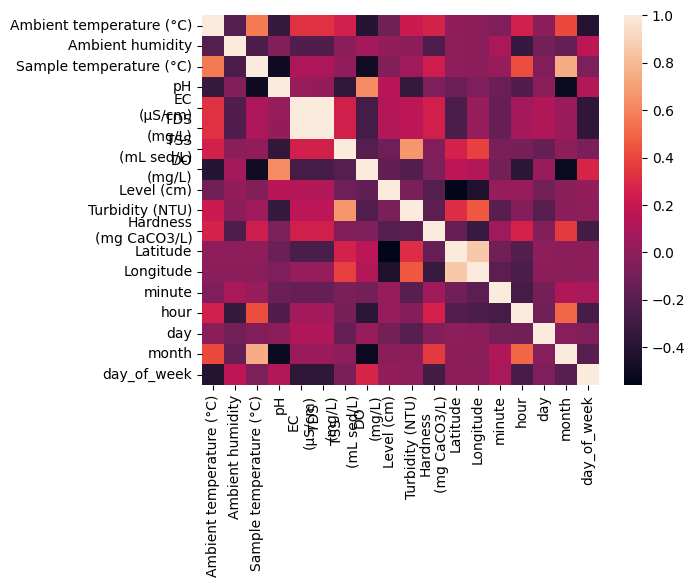

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'dz' is your DataFrame
# Select only numeric columns for correlation calculation
numeric_dz = dz.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_dz.corr()

# Create the heatmap
sns.heatmap(correlation_matrix)

Index(['Sampling point', 'Ambient temperature (°C)', 'Ambient humidity',
       'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)',
       'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)',
       'Hardness\n(mg CaCO3/L)', 'Hardness classification',
       'Total Cl-\n(mg Cl-/L)', 'Latitude', 'Longitude', 'geometry',
       'Datetime', 'minute', 'hour', 'day', 'month', 'day_of_week', 'hex_id'],
      dtype='object')


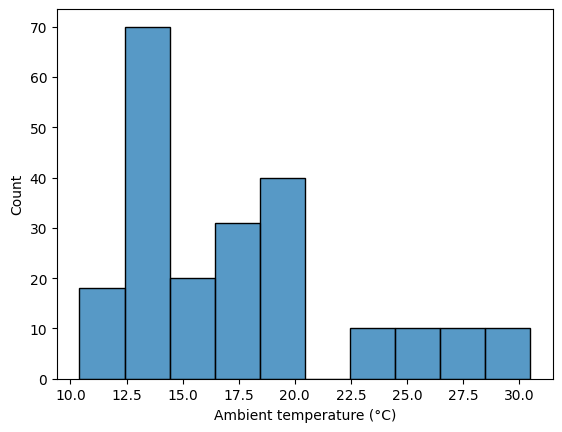

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'dz' is your GeoDataFrame
# Print the available columns in 'dz' to check if 'Ambient_temperature' exists
print(dz.columns)

# Replace 'Ambient_temperature' with the correct column name
# If you don't find 'Ambient_temperature', use the actual column name you intend to use.
# For example, if the correct column name is 'Ambient temperature (°C)':
sns.histplot(dz['Ambient temperature (°C)'])

plt.show()

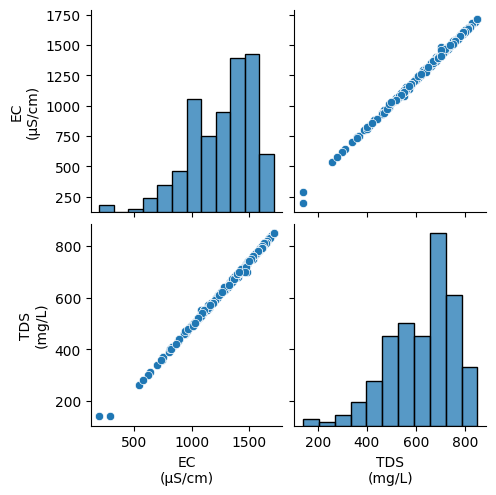

In [ ]:
sns.pairplot(dz[["EC\n(µS/cm)", "TDS\n(mg/L)", "Total Cl-\n(mg Cl-/L)"]])


<Axes: ylabel='DO\n(mg/L)'>

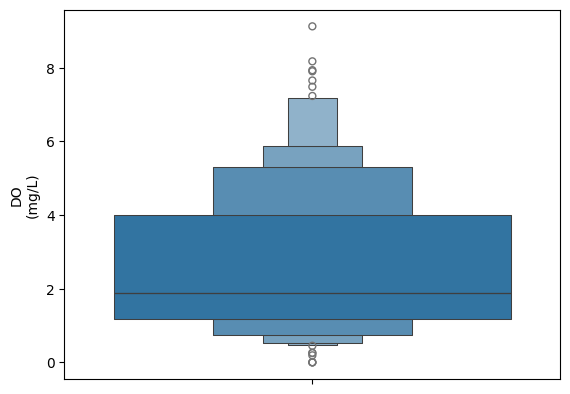

In [ ]:
sns.boxenplot(dz['DO\n(mg/L)'])

In [ ]:
from plotly.express import histogram
histogram(data_frame=dz, x='Sampling point').show()
histogram(data_frame=dz, x='Hardness classification').show()

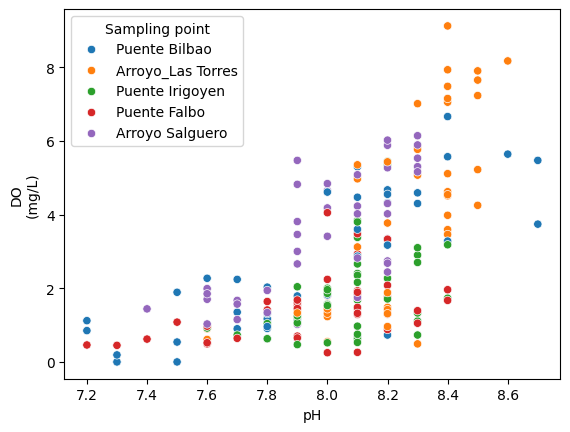

In [ ]:
sns.scatterplot(data= dz, x= 'pH', y= 'DO\n(mg/L)', hue= 'Sampling point')
plt.show()

It appears that **lower pH values give lower dissolved oxygen values**. Also, in this case, numerous red dots are observed. On the other hand, it seems that **higher pH values give higher Dissolved Oxygen values**. In this case we can see numerous orange dots.

Changing `Dates` to` Months`

In [ ]:
import re

pattern= re.compile('./05/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'May'

pattern= re.compile('./06/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'June'

pattern= re.compile('./6/.') # some dates lack a zero
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'June'

pattern= re.compile('./07/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'July'

pattern= re.compile('./08/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'August'

pattern= re.compile('./09/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'September'

pattern= re.compile('./10/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'October'

pattern= re.compile('./11/.')
mask= dz.iloc[:, 0].str.contains(pattern)
dz.loc[mask, 'Date (DD/MM/YYYY)'] = 'November'

dz.rename(columns= {'Date (DD/MM/YYYY)': 'Month'}, inplace= True)

In [ ]:
dz.head()

,Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),...,Longitude,geometry,Datetime,minute,hour,day,month,day_of_week,hex_id,Month
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-09 14:15:00,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,38.277778,...,-58.487694,POINT (-58.48769 -34.57443),2023-05-09 14:15:00,15,14,9,5,1,Empty GeoDataFrame Columns: [geometry] Index: [],NaN
2023-06-14 14:30:00,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,38.277778,...,-58.487694,POINT (-58.48769 -34.57443),2023-06-14 14:30:00,30,14,14,6,2,Empty GeoDataFrame Columns: [geometry] Index: [],NaN
2023-06-14 14:30:00,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,38.277778,...,-58.487694,POINT (-58.48769 -34.57443),2023-06-14 14:30:00,30,14,14,6,2,Empty GeoDataFrame Columns: [geometry] Index: [],NaN
2023-06-14 15:00:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,38.277778,...,-58.495511,POINT (-58.49551 -34.57854),2023-06-14 15:00:00,0,15,14,6,2,Empty GeoDataFrame Columns: [geometry] Index: [],NaN
2023-06-14 15:00:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,38.277778,...,-58.495511,POINT (-58.49551 -34.57854),2023-06-14 15:00:00,0,15,14,6,2,Empty GeoDataFrame Columns: [geometry] Index: [],NaN


In [ ]:
dz.shape

(219, 25)

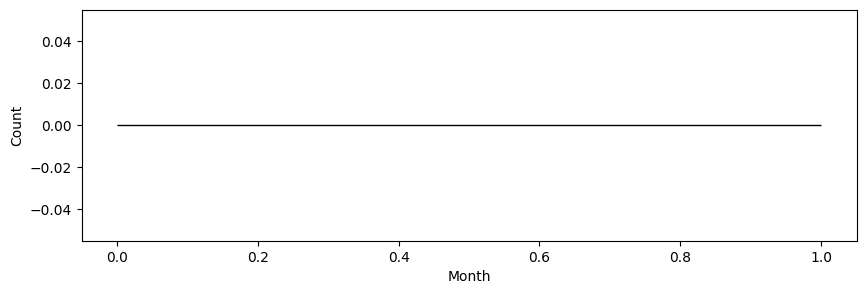

In [ ]:
plt.figure(figsize= (10,3))
sns.histplot(dz['Month'], color = 'green')
plt.show()

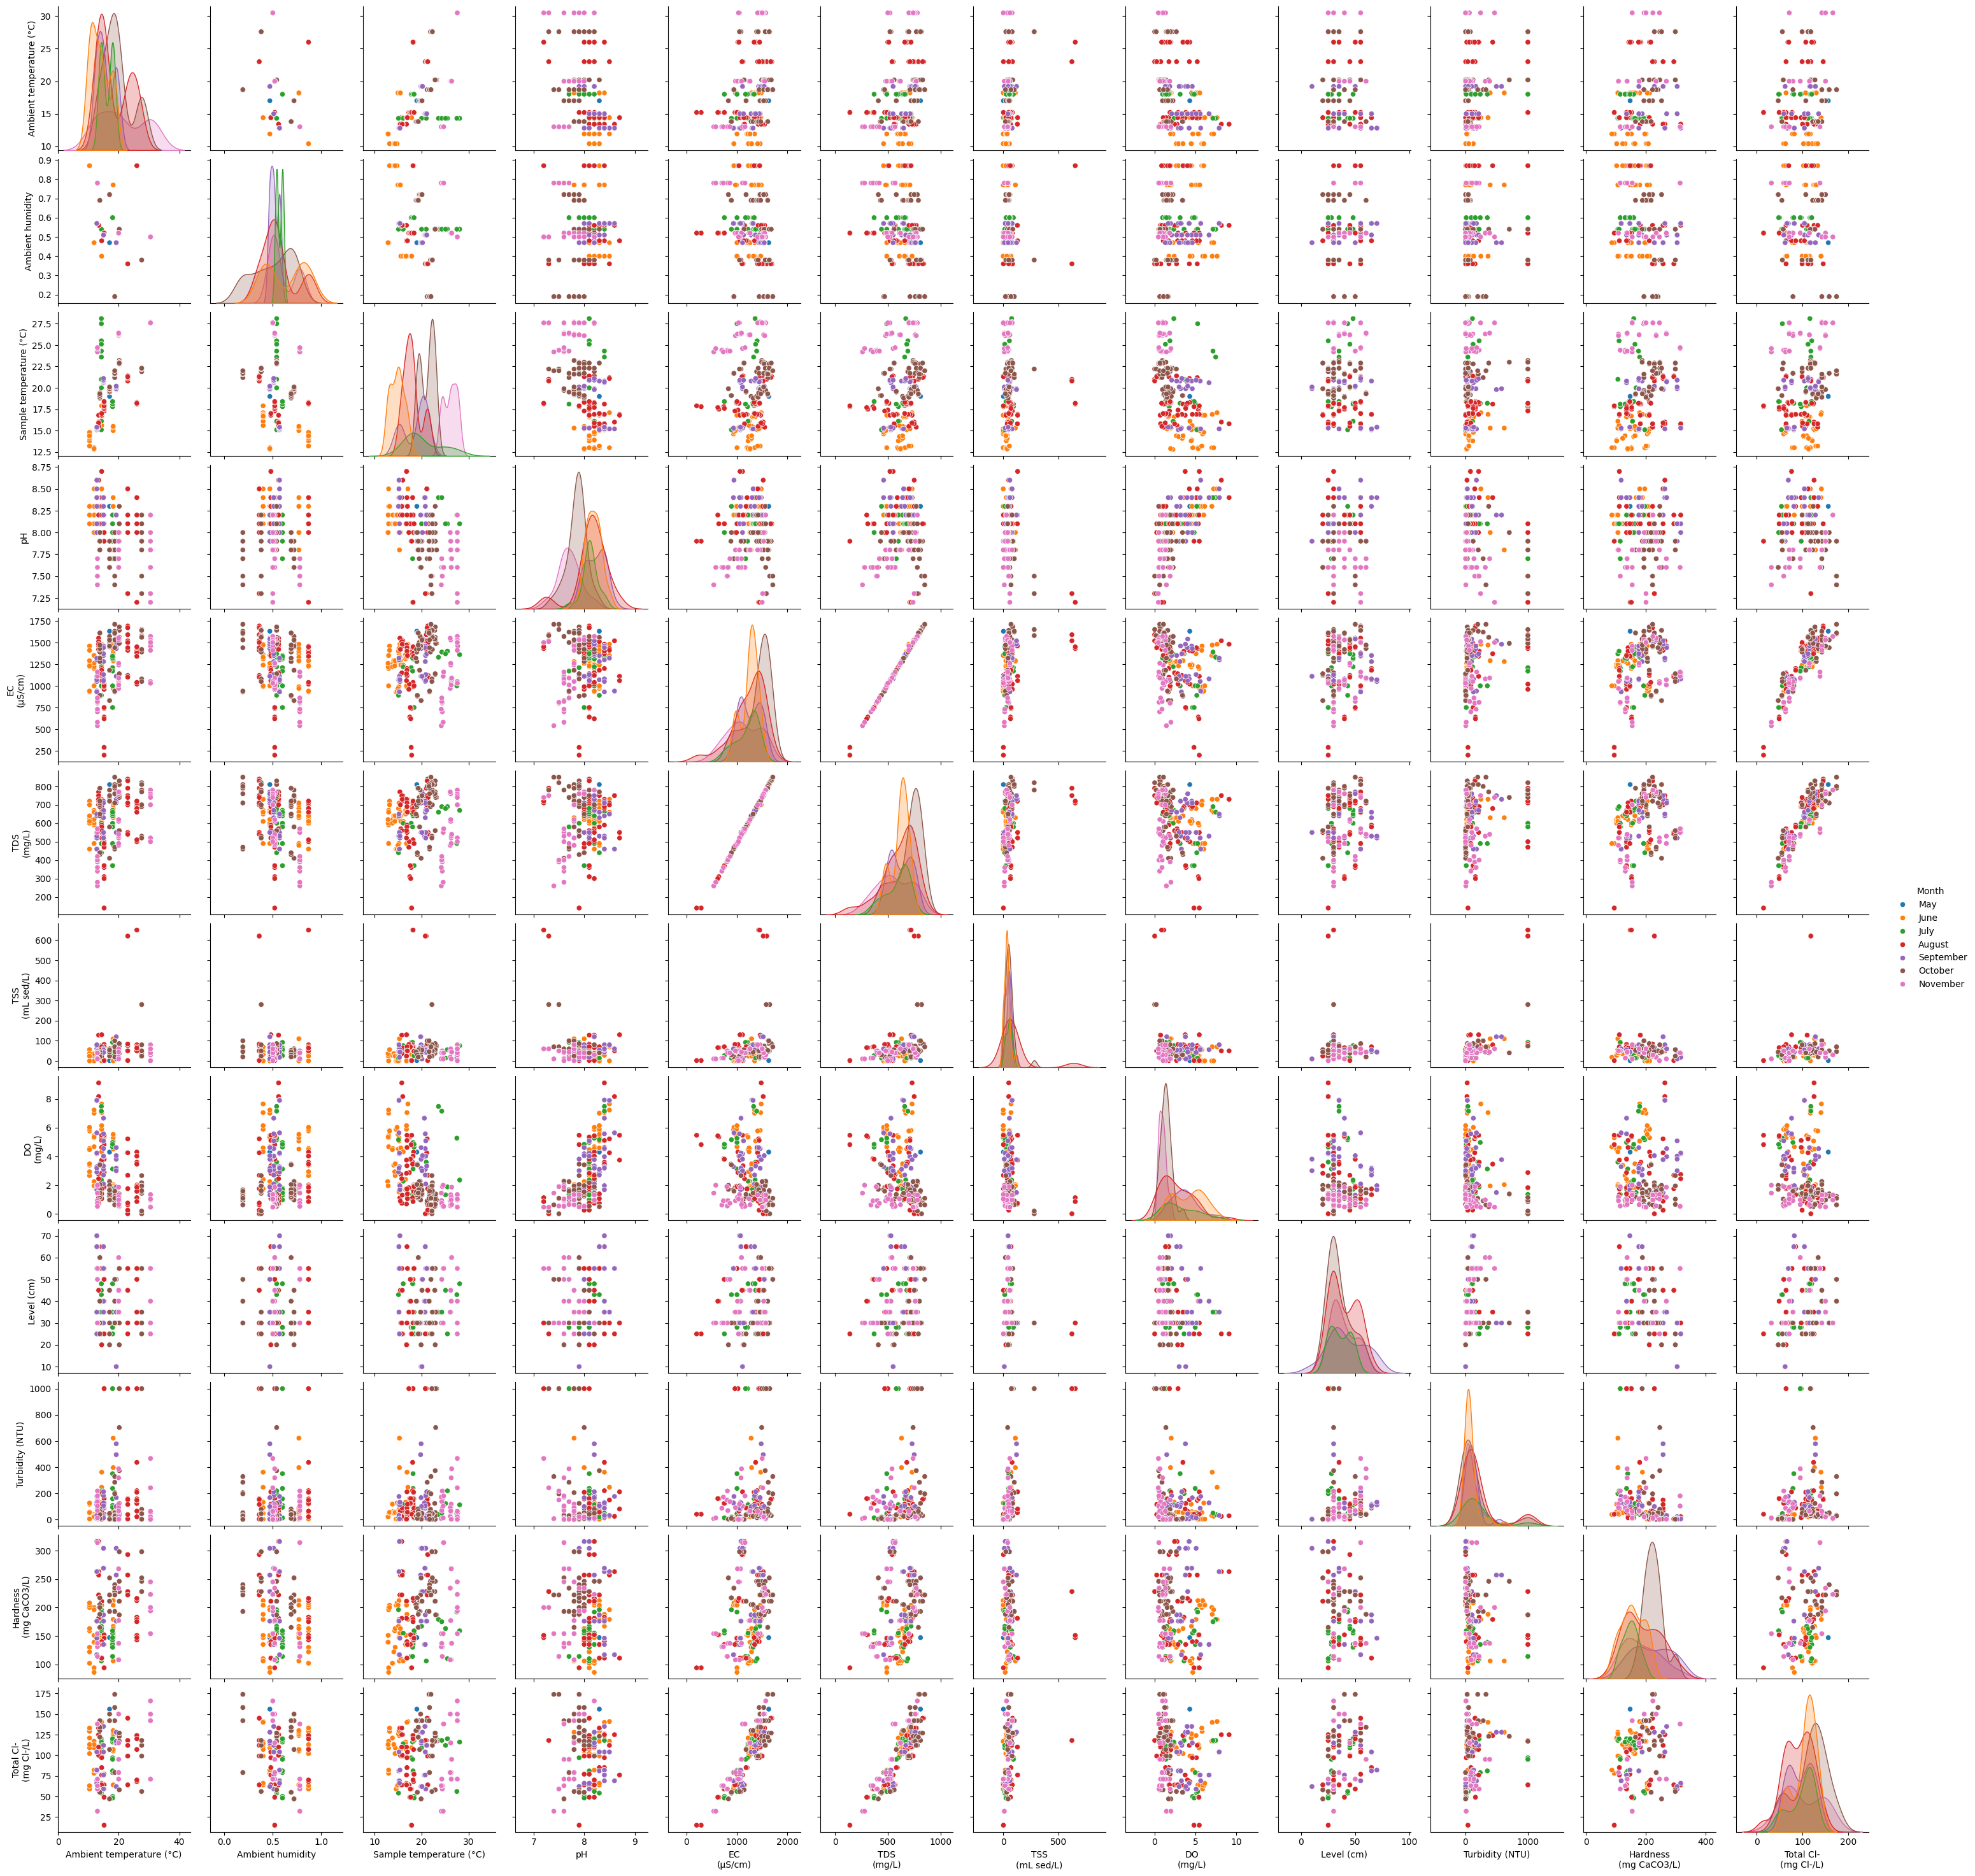

In [ ]:
sns.pairplot(gh, hue= 'Month')
plt.show()

From a chemical cryteria, I can see an interesting distribution in DO vs. pH scatter plot. Let's see it bigger

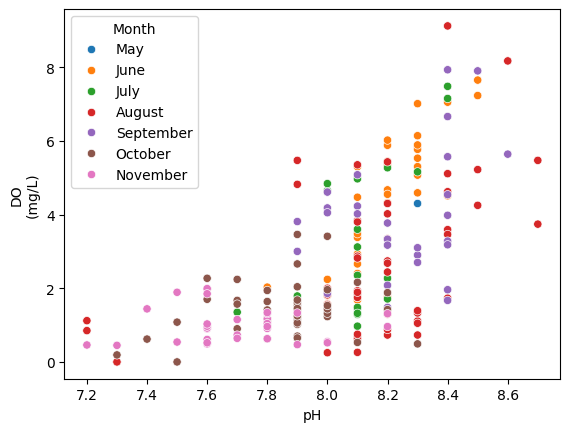

In [ ]:
sns.scatterplot(data= gh, x= 'pH', y= "DO\n(mg/L)", hue= 'Month')
plt.show()

It appears that lower pH values give lower dissolved oxygen values. Also, in this case, numerous red dots are observed. On the other hand, it seems that higher pH values give higher Dissolved Oxygen values. In this case we can see numerous orange dots.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


---
<a href=#seven></a>
## **Modeling ,Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models. Develop and train predictive or statistical models
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---




               Model       RMSE  R-squared
0  Linear Regression  14.030563   0.821663
1      Decision Tree  12.143246   0.866414
2      Random Forest   8.291706   0.937716
3                SVM  29.430381   0.215337


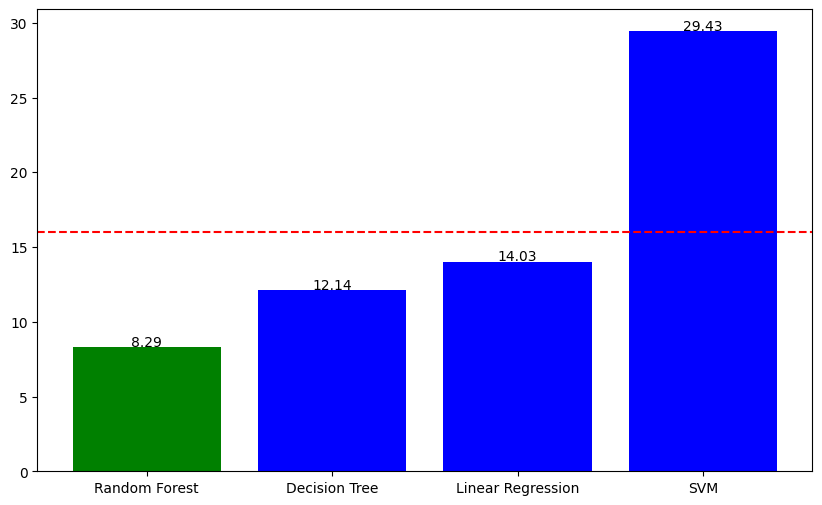

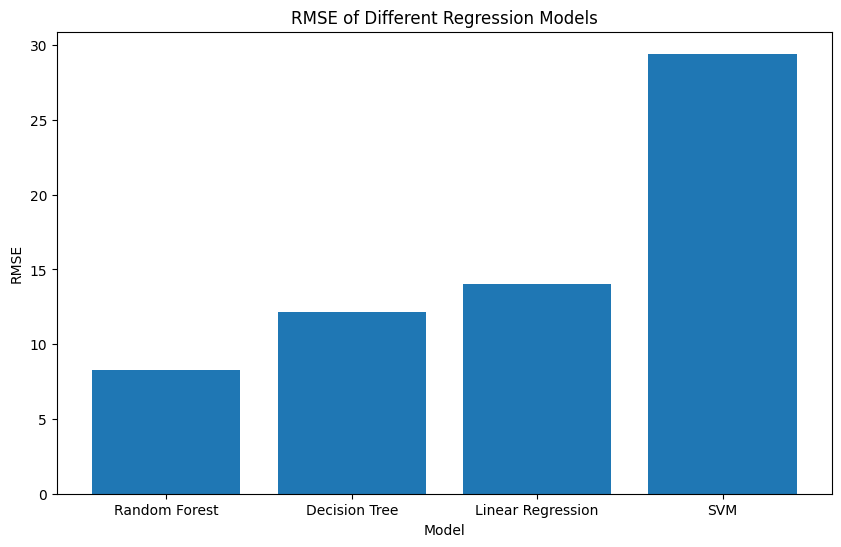

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np  # Import numpy
from sklearn.impute import KNNImputer # Import KNNImputer

# Load the dataset
#data = pd.read_csv("river_water_parameters_with_geometry.csv")

# Select features and target variable

X = dz[['Ambient temperature (°C)', 'Ambient humidity', 'pH',
            'EC\n(µS/cm)', 'TDS\n(mg/L)', 'TSS\n(mL sed/L)', 'DO\n(mg/L)',
            'Level (cm)', 'Turbidity (NTU)', 'Hardness\n(mg CaCO3/L)']]
y = dz[['Total Cl-\n(mg Cl-/L)']]

# Replace 'NA' with NaN before converting to numeric
X = X.replace('NA', np.nan).astype(float)  # Replace 'NA' with NaN and convert to float
y = y.replace('NA', np.nan).astype(float)  # Replace 'NA' with NaN and convert to float

# Impute missing values in X and y using KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Create a KNNImputer instance
X = imputer.fit_transform(X) # Impute missing values in X
y = imputer.fit_transform(y) # Impute missing values in y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R-squared': r2})
    #results.append({'Model': name, 'RMSE': rmse})

# Classification metrics
#accuracy = accuracy_score(y_test_class, y_pred_class)
#f1 = f1_score(y_test_class, y_pred_class)
#recall = recall_score(y_test_class, y_pred_class)



# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Sort models by RMSE for better visual clarity
results_df = results_df.sort_values(by='RMSE')

# Set up the plot
plt.figure(figsize=(10, 6))

# Color coding: Highlight the best model
colors = ['green' if rmse == results_df['RMSE'].min() else 'blue' for rmse in results_df['RMSE']]

# Bar plot
plt.bar(results_df['Model'], results_df['RMSE'], color=colors)

# Add numeric labels above each bar
for i, v in enumerate(results_df['RMSE']):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=10)

# Add baseline for average RMSE
plt.axhline(y=results_df['RMSE'].mean(), color='red', linestyle='--', label='Average RMSE')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Different Regression Models')
plt.show()

Linear Regression model, a Decision Tree model, a Random Forest model, and a Support Vector Machine (SVM) model to predict Total Cl- (mg Cl-/L).

Based on the results, the Linear Regression model has an RMSE of 14.04 and an R-squared of 0.82, the Decision Tree model has an RMSE of 12.08 and an R-squared of 0.87, the Random Forest model has an RMSE of 8.88 and an R-squared of 0.93, and the SVM model has an RMSE of 29.43 and an R-squared of 0.22.

The Random Forest model has the lowest RMSE and the highest R-squared among the four models, indicating that it performs the best in predicting the Total Cl- (mg Cl-/L) for this dataset.\

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


Random Forest RMSE: 8.41
Random Forest R-squared: 0.94


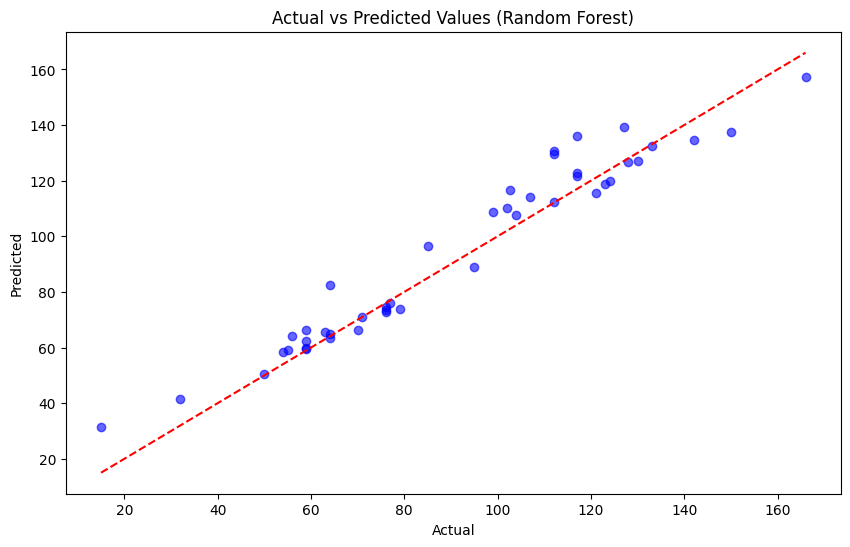

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from google.colab.output import enable_custom_widget_manager

# Initiate Power BI Authentication
#device_auth = DeviceCodeLoginAuthentication()

# Replace with your Workspace/Group ID and Report ID
#group_id = "YOUR_POWER_BI_GROUP_ID"
#report_id = "YOUR_POWER_BI_REPORT_ID"

# Embed the Power BI Report
#report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
#report.set_size(1024, 1088)

# Enable the widget manager for Colab
#enable_custom_widget_manager()

# Display the Power BI report
#print("Power BI Report:")
#display(report)

# Load the dataset (replace with your actual file or dataset)
# data = pd.read_csv("river_water_parameters_with_geometry.csv")

# Feature selection and target
X = dz[['Ambient temperature (°C)', 'Ambient humidity', 'pH',
        'EC\n(µS/cm)', 'TDS\n(mg/L)', 'TSS\n(mL sed/L)', 'DO\n(mg/L)',
        'Level (cm)', 'Turbidity (NTU)', 'Hardness\n(mg CaCO3/L)']]
y = dz[['Total Cl-\n(mg Cl-/L)']]

# Handle missing values by replacing 'NA' with NaN
X = X.replace('NA', np.nan).astype(float)
y = y.replace('NA', np.nan).astype(float)

# Impute missing values with KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.ravel())  # Ensure y_train is 1D

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R-squared: {r2:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()




---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


**Model Performance**:

* The Random Forest Regressor outperformed other regression models, achieving a lower RMSE and higher R-squared score, indicating a better fit to the data and more accurate predictions.

* Visualization of the Actual vs Predicted Values demonstrated the Random Forest model's ability to closely approximate the true values, with minimal variance.


**Feature Importance**:

* Feature importance analysis revealed which parameters had the most significant impact on predicting Total Cl- levels (e.g., pH, EC, or Ambient Temperature), providing actionable insights for water quality management.

**Imputation Effectiveness**:

* The use of KNNImputer for handling missing values proved effective in maintaining the integrity of the dataset and enabling robust model training.

**Insights Gained**:

* The relationship between water parameters and chlorine content (Cl-) is nonlinear and benefits from ensemble methods like Random Forest, which capture complex patterns better than linear models.
* Data preprocessing, especially handling missing values effectively, is critical for reliable modeling and analysis.

**Data Quality**:

* Missing values were imputed, but this process might introduce biases if the missingness is not random.
* The dataset size and representativeness across different geographic regions or temporal scales were not discussed, potentially limiting the model's generalizability.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

## Additional Sections to Consider

* ### Appendix:
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors:
If this is a group project, list the contributors and their roles or contributions to the project.
